<a href="https://colab.research.google.com/github/nandniuniyal/Zomato/blob/main/Zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato data analysis project**

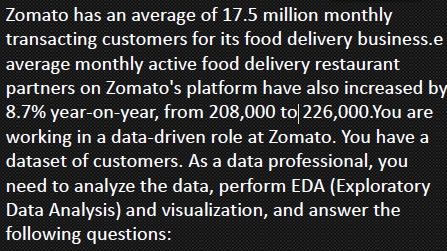

# Step-1 Importing **Libraries** **bold text** **bold text**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Step-2 Create the data frame.**

In [ ]:
dataframe = pd.read_csv("Zomatodata .csv")

In [ ]:
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# **Convert the datatype of column-rate (remove denominator)**

In [ ]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0];
  return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# **Type of resturant**

# **1) What type of restaurant do the majority of customers order from?**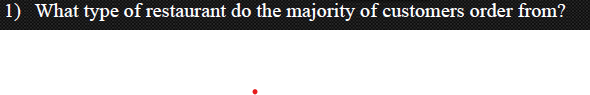

Text(0, 0.5, 'count')

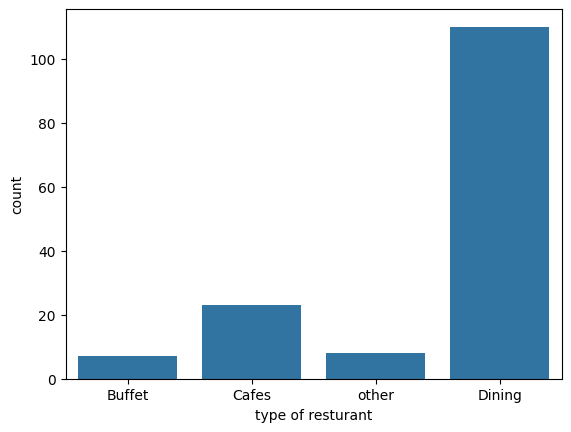

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('type of resturant')
plt.ylabel('count')

# **Conclusion: The majority of the restaurants fall into the dining category**

# **Dining restaurants are perferred by a larger number of individuals**

# **2. How many votes has each type of restaurant received from customers.**
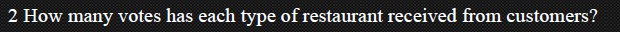

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

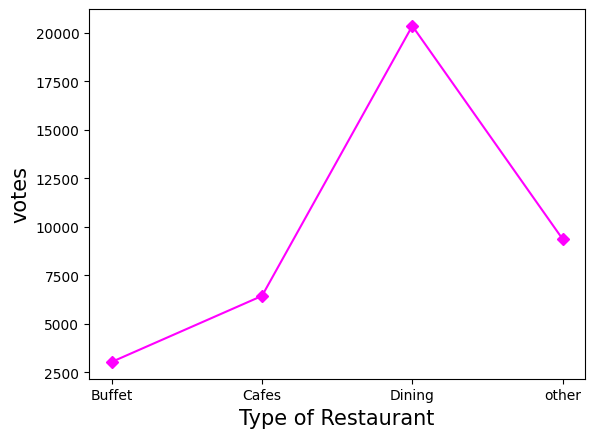

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="Magenta",marker="D")
plt.xlabel('Type of Restaurant',c="Black",size=15)
plt.ylabel('votes',c="Black",size=15)


# **Conclusion - Dinning restaurants has received maximum votes.**

# **3. What are the ratings that the majority of restaurants have received.**
image.png

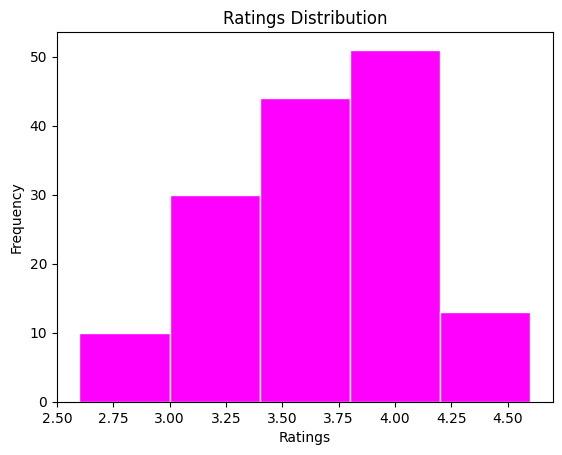

In [ ]:
plt.hist(dataframe['rate'],bins=5,color='magenta',edgecolor='white')
plt.xlabel("Ratings",color='black')
plt.ylabel("Frequency",color='black')
plt.title("Ratings Distribution")
plt.show()

# **Conclusion:  The majority of restaurants received ratings ranging from 3.5 to 4.**

# **4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?**
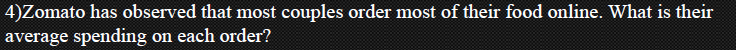

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

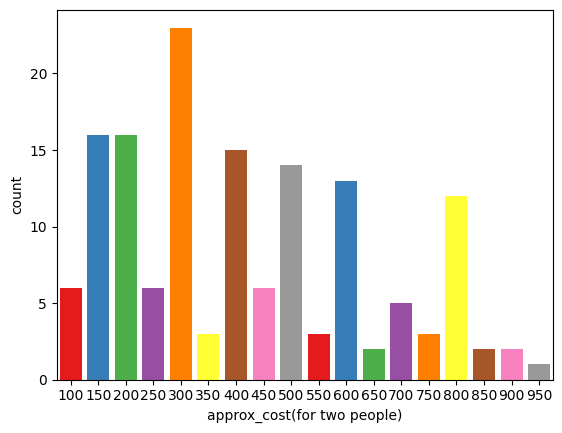

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,saturation = 1,palette = "Set1")

# **Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees**

# **5.Which mode(online or offline) has recerived the maximum rating?**
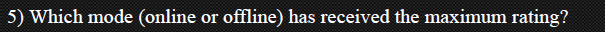


<Axes: xlabel='online_order', ylabel='rate'>

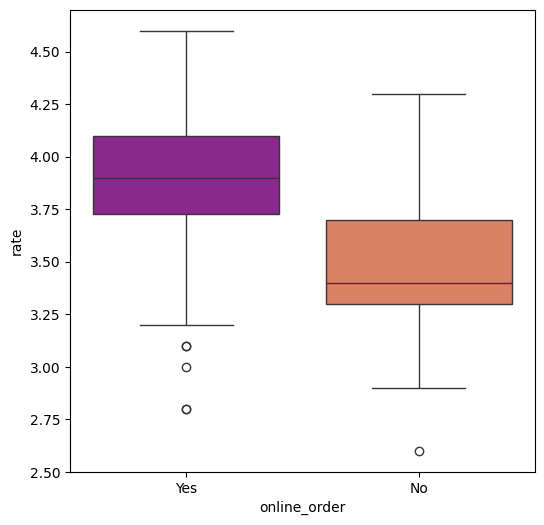

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe , palette='plasma')

# **Conclusion - offline order received lower rating in comparsion to online order**

# **6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?**
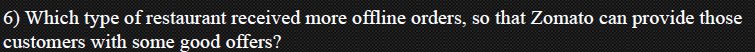

Text(50.722222222222214, 0.5, 'Listed In (Type)')

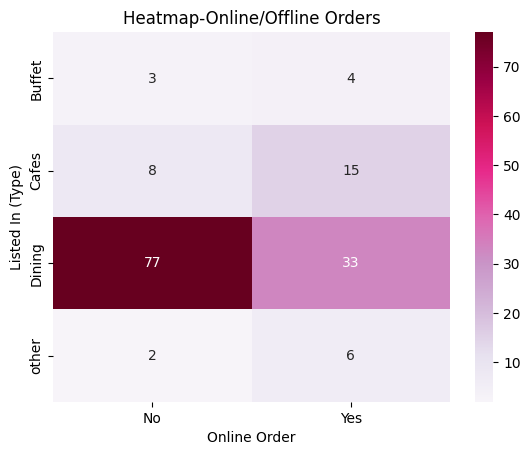

In [39]:
pivot_table = dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='PuRd',fmt='d')
plt.title("Heatmap-Online/Offline Orders")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

# **Conclusion : Dining restaurants primarily accept offline orders , whereas cafes primarily receives online orders. This suggests that clients primarily orders in person at restaurants , but prefer online ordering at cafes.**